In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## MI Fit Band steps analysis

In [2]:
activity_data = pd.read_excel('../data/ACTIVITY.xlsx')
activity_data.shape

(308, 5)

In [3]:
activity_data.head()

,date,steps,distance,calories,timeActive
0,2019-04-15,6158,4.28,167,01:17:00
1,2019-04-16,17791,13.67,561,03:20:00
2,2019-04-17,4889,3.51,146,01:04:00
3,2019-04-18,13788,10.47,429,02:33:00
4,2019-04-19,6303,4.43,170,01:20:00


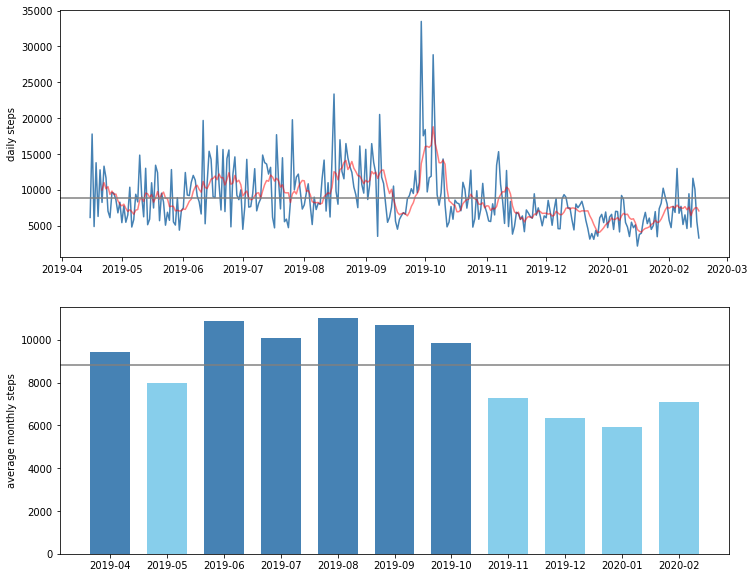

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

x1 = activity_data['date']
y1 = activity_data['steps']
y1_ma = activity_data['steps'].rolling(7).mean() # 7-day moving average
y1_mean = activity_data['steps'].mean() # total mean

activity_data['year_month'] = activity_data['date'].astype(str).str[:7]
activity_data_monthly = activity_data.groupby(['year_month']).mean().reset_index()
x2 = activity_data_monthly['year_month']
y2 = activity_data_monthly['steps']

# creating daily steps line plot along with 7-day moving average and total average of steps
ax1.plot(x1, y1, color='steelblue')
ax1.plot(x1, y1_ma, color='red', alpha=0.5)
ax1.axhline(y1_mean, color='grey')
ax1.set_ylabel('daily steps')

# creating monthly steps bar chart
colors = np.where(y2 > y1_mean, 'steelblue', 'skyblue') # check if monthly step count is higher than total average
ax2.bar(x2, y2, color=colors, width=0.7)
ax2.axhline(y1_mean, color='grey')
ax2.set_ylabel('average monthly steps')

plt.show()

In [5]:
round(activity_data['steps'].mean(), 0)

8824.0

In [6]:
summer = activity_data_monthly[(activity_data_monthly['year_month'] >= '2019-06') & 
                               (activity_data_monthly['year_month'] <= '2019-10')]
winter = activity_data_monthly[(activity_data_monthly['year_month'] >= '2019-11') & 
                               (activity_data_monthly['year_month'] <= '2020-02')]
round((summer['steps'].mean() / winter['steps'].mean() - 1) * 100, 1)

57.6

=======================================================

During the whole period from April 2019 to February 2020 the average step count per day is 8824. As we see in the bar chart, summer-autumn months are move active compared to autumn-winter months: average step count during June-October is higher than November-February by 57.6%.

We can also see some outliers at the end of September / start of October, which caused September and October to stay almost inline with summer months and quite big decrease going from October to November.

=======================================================

### Steps correlation with distance, calories and active time

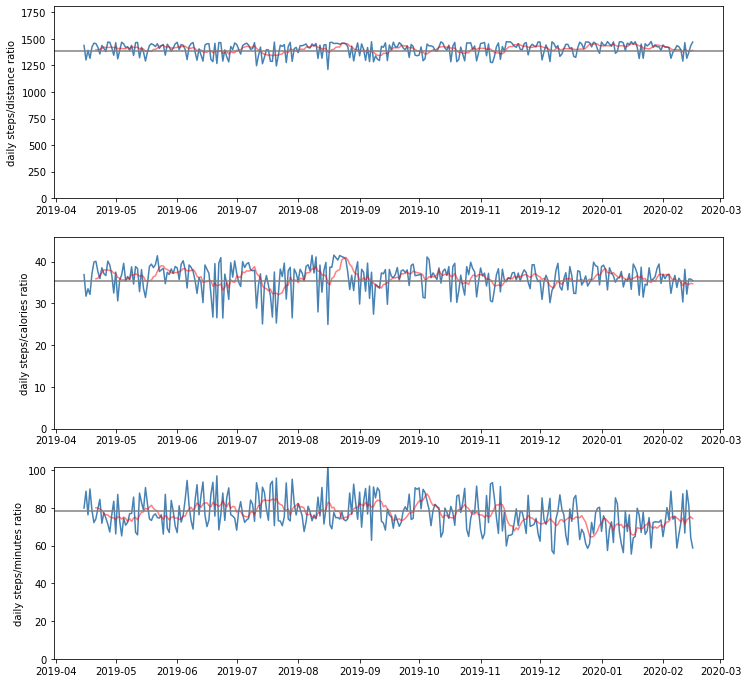

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))

x1 = activity_data['date']
y1 = activity_data['steps'] / activity_data['distance'] # steps per kilometer
y1_ma = y1.rolling(7).mean() # 7-day moving average
y1_mean = activity_data['steps'].mean() / activity_data['distance'].mean()

x2 = activity_data['date']
y2 = activity_data['steps'] / activity_data['calories'] # steps per calory
y2_ma = y2.rolling(7).mean() # 7-day moving average
y2_mean = activity_data['steps'].mean() / activity_data['calories'].mean()

activity_data['timeActiveSpl'] = activity_data['timeActive'].astype(str).str.split(':')
activity_data['minutes'] = activity_data['timeActiveSpl'].apply(lambda x: int(x[0]) * 60 + int(x[1]))
x3 = activity_data['date']
y3 = activity_data['steps'] / activity_data['minutes'] # steps per active minute
y3_ma = y3.rolling(7).mean() # 7-day moving average
y3_mean = activity_data['steps'].mean() / activity_data['minutes'].mean()

# creating daily line plot of steps/distance ratio along with 7-day moving average and total average
ax1.plot(x1, y1, color='steelblue')
ax1.plot(x1, y1_ma, color='red', alpha=0.5)
ax1.axhline(y1_mean, color='grey')
ax1.set_ylim(ymin=0, ymax=y1_mean * 1.3)
ax1.set_ylabel('daily steps/distance ratio')

# creating daily line plot of steps/calories ratio along with 7-day moving average and total average
ax2.plot(x2, y2, color='steelblue')
ax2.plot(x2, y2_ma, color='red', alpha=0.5)
ax2.axhline(y2_mean, color='grey')
ax2.set_ylim(ymin=0, ymax=y2_mean * 1.3)
ax2.set_ylabel('daily steps/calories ratio')

# creating daily line plot of steps/minutes ratio along with 7-day moving average and total average
ax3.plot(x3, y3, color='steelblue')
ax3.plot(x3, y3_ma, color='red', alpha=0.5)
ax3.axhline(y3_mean, color='grey')
ax3.set_ylim(ymin=0, ymax=y3_mean * 1.3)
ax3.set_ylabel('daily steps/minutes ratio')

plt.show()

In [8]:
activity_data.corr()

,steps,distance,calories,minutes
steps,1.000000,0.994335,0.960157,0.974592
distance,0.994335,1.000000,0.981396,0.948762
calories,0.960157,0.981396,1.000000,0.892785
minutes,0.974592,0.948762,0.892785,1.000000


In [9]:
round(activity_data['steps'].mean() / activity_data['distance'].mean(), 0)

1388.0

In [10]:
round(activity_data['steps'].mean() / activity_data['calories'].mean(), 0)

35.0

In [11]:
round(activity_data['steps'].mean() / activity_data['minutes'].mean(), 0)

78.0

=======================================================

This sections aims to answer the question are the steps highly correlated with distance travelled, calories burned and active minutes, and how many steps on average are per 1 kilometer, 1 calory and 1 active minute.

As we can see in the graphs and correlation matrix, all of these measures are very high correlated, steps and distance being the most correlated (99.4%) and it converts to 1388 steps per 1 kilometer on average. Going a little bit back to the previous section, the average 8824 steps per day converts to 8824 / 1388 = 6.34 kilometers per day.

Correlation between the steps and calories is a bit lower (96.0%), and we can see some more variance during June-August, where it required a bit less steps to burn one calory, which on average is 35.3 steps to burn one calory.

Finally, the correlation between steps and active minutes is 89.3%, the least of all these measures, but still very high. The average steps per one active minute is 78.3, which is a bit higher during summer-autumn than autumn-winter, with the assumption that movement is slower during this time :)

=======================================================

### Steps analysis by weekday

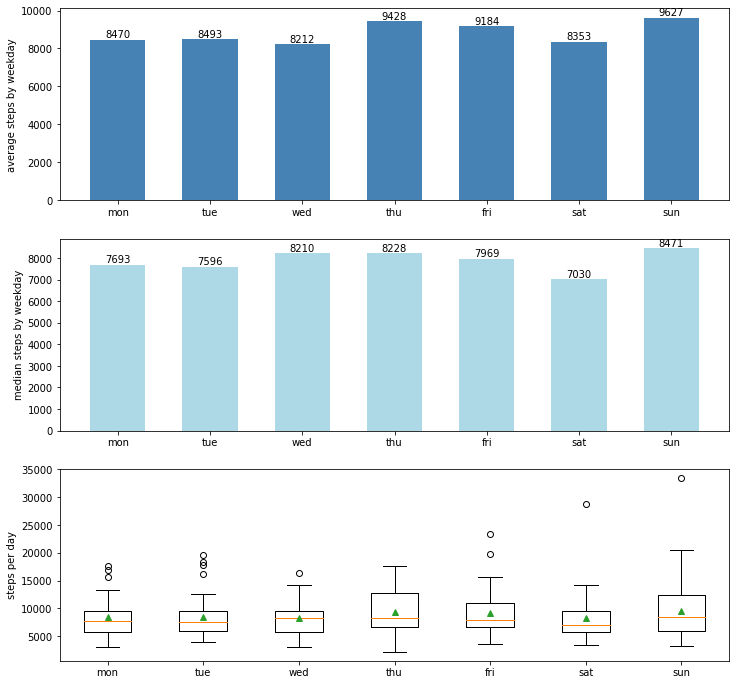

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))

activity_data['weekday'] = activity_data['date'].dt.dayofweek
activity_data_weekday_mean = activity_data.groupby(['weekday']).mean().reset_index()
activity_data_weekday_median = activity_data.groupby(['weekday']).median().reset_index()
weekday_mapping = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}

x1 = activity_data_weekday_mean['weekday'].map(weekday_mapping)
y1 = activity_data_weekday_mean['steps']

x2 = activity_data_weekday_median['weekday'].map(weekday_mapping)
y2 = activity_data_weekday_median['steps']

data_mon = np.array(activity_data['steps'][activity_data['weekday'] == 0])
data_tue = np.array(activity_data['steps'][activity_data['weekday'] == 1])
data_wed = np.array(activity_data['steps'][activity_data['weekday'] == 2])
data_thu = np.array(activity_data['steps'][activity_data['weekday'] == 3])
data_fri = np.array(activity_data['steps'][activity_data['weekday'] == 4])
data_sat = np.array(activity_data['steps'][activity_data['weekday'] == 5])
data_sun = np.array(activity_data['steps'][activity_data['weekday'] == 6])
data = [data_mon, data_tue, data_wed, data_thu, data_fri, data_sat, data_sun]

# creating bar chart for average steps by weekday
rect1 = ax1.bar(x1, round(y1, 0), color='steelblue', width=0.6)
ax1.set_ylabel('average steps by weekday')
ax1.bar_label(rect1)

# creating bar chart for median steps by weekday
rect2 = ax2.bar(x2, round(y2, 0), color='lightblue', width=0.6)
ax2.set_ylabel('median steps by weekday')
ax2.bar_label(rect2)

# creating box plot for steps by weekday
ax3.boxplot(data, showmeans=True, labels=weekday_mapping.values())
ax3.set_ylabel('steps per day')

plt.show()

=======================================================

It was intriguing to understand if activity during the working days differs from the activity during the weekends. As wee see in the graphs, surprisingly, the biggest difference is between two weekend days - saturday (median of 7030 steps) and sunday (median of 8471 steps).

Another interesting fact is that almost all weekdays have lower median than mean, which can be see either in two bar charts (the top one is with means and the middle one is with medians) or in the box plot, where we see quite a lot of outlier circles above the boxes, as well as green triangles (mean) being placed higher than orange lines (median).

=======================================================

### Steps in MI Fit Band vs Huawei

In [13]:
activity_data = pd.read_excel('../data/ACTIVITY.xlsx')
activity_data.shape

(308, 5)

In [14]:
huawei_data = pd.read_excel('../data/HUAWEI.xlsx')
huawei_data.shape

(308, 4)

In [15]:
merged_data = pd.merge(activity_data.drop('timeActive', axis=1), huawei_data, on='date', suffixes=('_mi_fit','_huawei'))
merged_data.shape

(308, 7)

In [16]:
merged_data.head()

,date,steps_mi_fit,distance_mi_fit,calories_mi_fit,steps_huawei,distance_huawei,calories_huawei
0,2019-04-15,6158,4.28,167,2713,2.05,92
1,2019-04-16,17791,13.67,561,16077,12.10,545
2,2019-04-17,4889,3.51,146,3164,2.39,108
3,2019-04-18,13788,10.47,429,10588,8.00,360
4,2019-04-19,6303,4.43,170,2967,2.24,101


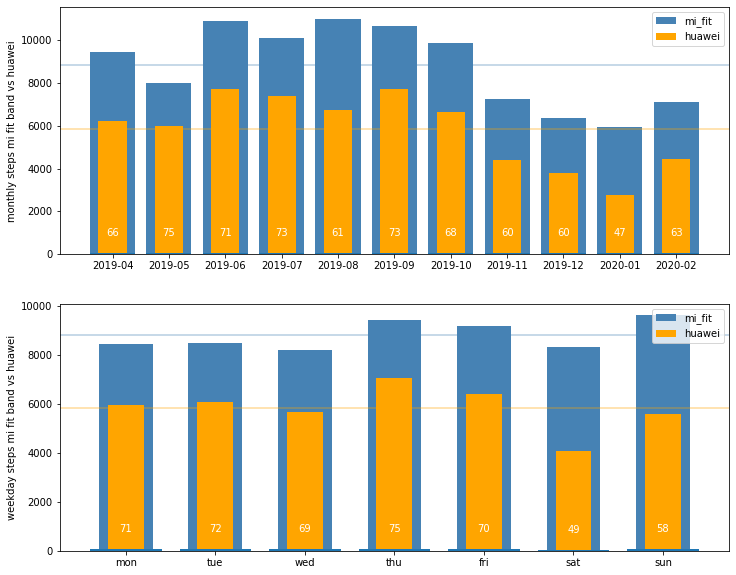

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

merged_data['year_month'] = merged_data['date'].astype(str).str[:7]
merged_data_monthly = merged_data.groupby(['year_month']).mean().reset_index()
x1 = merged_data_monthly['year_month']
y1_mi_fit = merged_data_monthly['steps_mi_fit']
y1_huawei = merged_data_monthly['steps_huawei']

merged_data['weekday'] = merged_data['date'].dt.dayofweek
merged_data_weekday = merged_data.groupby(['weekday']).mean().reset_index()
weekday_mapping = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
x2 = merged_data_weekday['weekday'].map(weekday_mapping)
y2_mi_fit = merged_data_weekday['steps_mi_fit']
y2_huawei = merged_data_weekday['steps_huawei']

# creating monthly steps bar chart for mi fit band vs huawei
ax1.bar(x1, y1_mi_fit, color='steelblue', label='mi_fit')
ax1.bar(x1, y1_huawei, color='orange', label='huawei', width=0.5)
ax1.axhline(merged_data['steps_mi_fit'].mean(), color='steelblue', alpha=0.4)
ax1.axhline(merged_data['steps_huawei'].mean(), color='orange', alpha=0.4)
ax1.set_ylabel('monthly steps mi fit band vs huawei')
ax1.bar_label(ax1.bar(x1, round(y1_huawei / y1_mi_fit * 100, 0)), color='white', padding=15)
ax1.legend(loc='upper right')

# creating weekday steps bar chart for mi fit band vs huawei
ax2.bar(x2, y2_mi_fit, color='steelblue', label='mi_fit', width=0.6)
ax2.bar(x2, y2_huawei, color='orange', label='huawei', width=0.4)
ax2.axhline(merged_data['steps_mi_fit'].mean(), color='steelblue', alpha=0.4)
ax2.axhline(merged_data['steps_huawei'].mean(), color='orange', alpha=0.4)
ax2.set_ylabel('weekday steps mi fit band vs huawei')
ax2.bar_label(ax2.bar(x2, round(y2_huawei / y2_mi_fit * 100, 0)), color='white', padding=15)
ax2.legend(loc='upper right')

plt.show()

In [18]:
round(merged_data['steps_huawei'].mean(), 0)

5849.0

In [19]:
round(merged_data['steps_mi_fit'].mean(), 0)

8824.0

In [20]:
round(merged_data['steps_huawei'].mean() / merged_data['steps_mi_fit'].mean() * 100, 1)

66.3

=======================================================

This section is dedicated to understand the relation of data collected with MI Fit Band vs data collected with Huawei phone. Not all the activity is recorded with the phone compared with the band, which covers almost all the activity during this period.

As wee can see in the graphs and the calculations below the graphs, Huawei phone covered only two thirds (66.3%) of all the activity recorded with MI Fit Band.

The phone coverage is less during autumn-winter months compared with summer-autumn months, as well as during the weekends (only 49% on saturday and 58% on sunday), with the assumption that phone usage is less on weekends.

=======================================================

## MI Fit Band sleep analysis

In [21]:
sleep_data = pd.read_excel('../data/SLEEP.xlsx')
sleep_data.shape

(308, 8)

In [22]:
sleep_data.head()

,date,inBedFor,deepSleep,lightSleep,timeAwake,fellAsleepAt,wokeUpAt,sleepScore
0,2019-04-15,07:23:00,02:36:00,04:47:00,1899-12-30 00:00:00,23:27:00,06:50:00,96
1,2019-04-16,08:30:00,03:23:00,05:07:00,00:02:00,21:38:00,06:10:00,96
2,2019-04-17,08:04:00,03:15:00,04:49:00,1899-12-30 00:00:00,22:53:00,06:57:00,98
3,2019-04-18,09:35:00,04:37:00,04:58:00,1899-12-30 00:00:00,21:06:00,06:41:00,93
4,2019-04-19,05:45:00,03:02:00,02:43:00,01:05:00,23:58:00,06:48:00,68


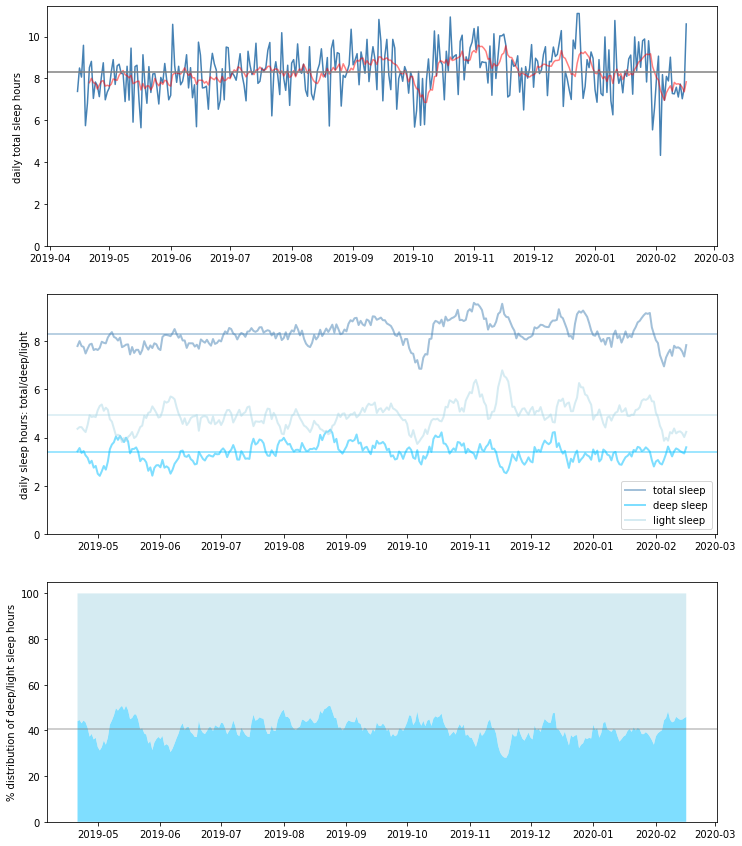

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,15))

sleep_data['inBedForSpl'] = sleep_data['inBedFor'].astype(str).str.split(':')
sleep_data['sleep_hours'] = sleep_data['inBedForSpl'].apply(lambda x: int(x[0]) + int(x[1]) / 60)

sleep_data['deepSleepSpl'] = sleep_data['deepSleep'].astype(str).str.split(':')
sleep_data['deep_sleep_hours'] = sleep_data['deepSleepSpl'].apply(lambda x: int(x[0]) + int(x[1]) / 60)

sleep_data['lightSleepSpl'] = sleep_data['lightSleep'].astype(str).str.split(':')
sleep_data['light_sleep_hours'] = sleep_data['lightSleepSpl'].apply(lambda x: int(x[0]) + int(x[1]) / 60)

x = sleep_data['date']

y1 = sleep_data['sleep_hours']
y1_ma = sleep_data['sleep_hours'].rolling(7).mean() # 7-day moving average
y1_mean = sleep_data['sleep_hours'].mean()

y2 = sleep_data['deep_sleep_hours']
y2_ma = sleep_data['deep_sleep_hours'].rolling(7).mean() # 7-day moving average
y2_mean = sleep_data['deep_sleep_hours'].mean()

y3 = sleep_data['light_sleep_hours']
y3_ma = sleep_data['light_sleep_hours'].rolling(7).mean() # 7-day moving average
y3_mean = sleep_data['light_sleep_hours'].mean()

# creating daily total sleep hours line plot along with 7-day moving average and total average of steps
ax1.plot(x, y1, color='steelblue')
ax1.plot(x, y1_ma, color='red', alpha=0.5)
ax1.axhline(y1_mean, color='grey')
ax1.set_ylim(ymin=0)
ax1.set_ylabel('daily total sleep hours')

# creating 7-day moving avergae lines plot for total sleep, deep sleep and light sleep hours
ax2.plot(x, y1_ma, color='steelblue', alpha=0.5, linewidth=2, label='total sleep')
ax2.axhline(y1_mean, color='steelblue', alpha=0.5)
ax2.plot(x, y2_ma, color='deepskyblue', alpha=0.5, linewidth=2, label='deep sleep')
ax2.axhline(y2_mean, color='deepskyblue', alpha=0.5)
ax2.plot(x, y3_ma, color='lightblue', alpha=0.5, linewidth=2, label='light sleep')
ax2.axhline(y3_mean, color='lightblue', alpha=0.5)
ax2.set_ylim(ymin=0)
ax2.set_ylabel('daily sleep hours: total/deep/light')
ax2.legend(loc='lower right')

# creating 7-day moving average stackplot for deep sleep vs light sleep % share
ax3.stackplot(x, y2_ma / y1_ma * 100, y3_ma / y1_ma * 100, colors=['deepskyblue','lightblue'], alpha=0.5)
ax3.axhline(y2_mean / y1_mean * 100, color='grey', alpha=0.5)
ax3.set_ylabel('% distribution of deep/light sleep hours')

plt.show()

In [24]:
round(sleep_data['sleep_hours'].mean(), 2)

8.32

In [25]:
round(sleep_data['deep_sleep_hours'].mean(), 2)

3.39

In [26]:
round(sleep_data['light_sleep_hours'].mean(), 2)

4.93

In [27]:
round(sleep_data['deep_sleep_hours'].mean() / sleep_data['sleep_hours'].mean() * 100, 1)

40.8

=======================================================

Sleep data was also collected with MI Fit Band. As we can see in the graphs and the calculations below, the average sleep time during the whole period is ~8.32 hours, which is approximately 8 hours and 19 minutes. We can see some slight decreases in sleep time at the start of October or at the start of February, but in general sleep time is quite stable ranging from 6 to 10 hours.

MI Fit Band also splits sleep time to the deep sleep and light sleep. As we can see in the graphs, deep sleep is approximately 40.8% of all the sleep, and the light sleep is approximately 59.2% of all the sleep.

=======================================================

### Sleep hours by weekday

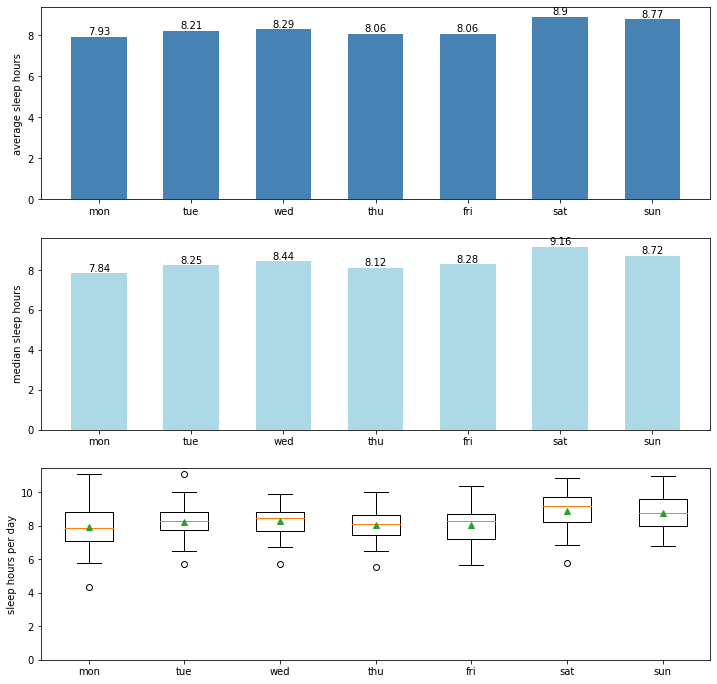

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))

sleep_data['weekday'] = sleep_data['date'].dt.dayofweek
sleep_data_weekday_mean = sleep_data.groupby(['weekday']).mean().reset_index()
sleep_data_weekday_median = sleep_data.groupby(['weekday']).median().reset_index()
weekday_mapping = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}

x1 = sleep_data_weekday_mean['weekday'].map(weekday_mapping)
y1 = sleep_data_weekday_mean['sleep_hours']

x2 = sleep_data_weekday_median['weekday'].map(weekday_mapping)
y2 = sleep_data_weekday_median['sleep_hours']

data_mon = np.array(sleep_data['sleep_hours'][sleep_data['weekday'] == 0])
data_tue = np.array(sleep_data['sleep_hours'][sleep_data['weekday'] == 1])
data_wed = np.array(sleep_data['sleep_hours'][sleep_data['weekday'] == 2])
data_thu = np.array(sleep_data['sleep_hours'][sleep_data['weekday'] == 3])
data_fri = np.array(sleep_data['sleep_hours'][sleep_data['weekday'] == 4])
data_sat = np.array(sleep_data['sleep_hours'][sleep_data['weekday'] == 5])
data_sun = np.array(sleep_data['sleep_hours'][sleep_data['weekday'] == 6])
data = [data_mon, data_tue, data_wed, data_thu, data_fri, data_sat, data_sun]

# creating bar chart for average sleep hours by weekday
rect1 = ax1.bar(x1, round(y1, 2), color='steelblue', width=0.6)
ax1.set_ylabel('average sleep hours')
ax1.bar_label(rect1)

# creating bar chart for median sleep hours by weekday
rect2 = ax2.bar(x2, round(y2, 2), color='lightblue', width=0.6)
ax2.set_ylabel('median sleep hours')
ax2.bar_label(rect2)

# creating box plot for sleep hours by weekday
ax3.boxplot(data, showmeans=True, labels=weekday_mapping.values())
ax3.set_ylabel('sleep hours per day')
ax3.set_ylim(ymin=0)

plt.show()

=======================================================

It is interesting to understand how weekday is affecting the sleep time, and in the graphs above we can see that the sleep time during the weekends is a bit higher compared to working days, with the highest value being on saturdays (Friday to Saturday) - 9.16 hours per night, and the lowest on mondays (Sunday to Monday) - 7.84 hours per night.

Differently than with steps, where we saw more top outliers, here with the sleep data we can see more bottom outliers.

=======================================================

### Better understanding of sleep score

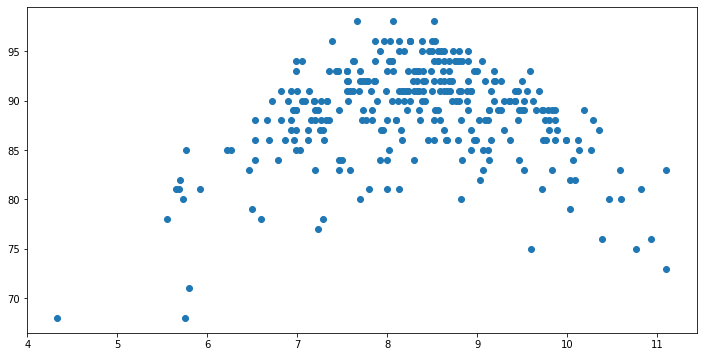

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.scatter(sleep_data['sleep_hours'], sleep_data['sleepScore'])
plt.show()

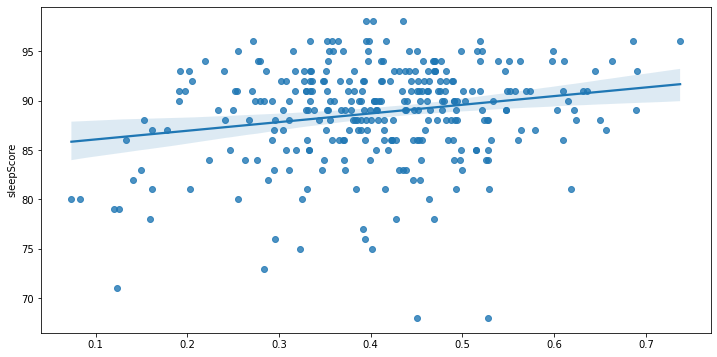

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax = sns.regplot(x=sleep_data['deep_sleep_hours'] / sleep_data['sleep_hours'], y=sleep_data['sleepScore'])

In [31]:
x = sleep_data['deep_sleep_hours'] / sleep_data['sleep_hours']
y = sleep_data['sleepScore']
round(x.corr(y), 2)

0.21

=======================================================

MI Fit Band also generates the sleep score, which is quite interesting to understand what could be the factors influencing it. Here are some of the assumptions that sleep time itself is quite important factor for better sleep score, as well as more deep sleep during the whole sleep time.

As we can see in the top scatter plot, the biggest sleep scores are when the sleep time is around 8 hours. Sleep score tends to decrease if the sleep time is quite low or quite high compare with the average sleep time.

In the bottom plot we can see how the share of deep sleep time relates to the sleep score. The more deep sleep - the sleep score tends to increase a little bit, but the correlation coefficient between these measures is only 21%, very slight positive correlation.

=======================================================